#Task 1 - Web scraping to gain company insights

This first task is focused on scraping and collecting customer feedback and reviewing data from a third-party source (Skytrax) and analysing this data to gain company insights


In [83]:
#importing libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [84]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"

###Data Collection

In [85]:
pages = 10
page_size = 100

#create empty lists
reviews = []
rating = []
date = []
country = []

In [86]:
# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for i in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(i.get_text())
    for i in parsed_content.find_all('div', {"class": "rating-10"})[1:]:
        rating.append(i.span.text)
    for i in parsed_content.find_all('time'):
        date.append(i.text)
    for i in parsed_content.find_all('h3'):
        country.append(i.span.next_sibling.text.strip(" ()"))

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10


In [87]:
print(reviews)
print(len(reviews))

['✅ Trip Verified | An excellent flight on BA CityFlyer. The plane was clean, comfortable and spacious. Crew were friendly, and I was very pleasantly surprised to be offered a choice of complimentary alcoholic beverages on this one hour flight! Departure was on-time, and I appreciated the cockpit keeping us updated (and encouraging us to enjoy the views as we came into land at London City). An easy and enjoyable flight - just as it should be!', '✅ Trip Verified |   Crew were amazing and attentive, nothing was missed out by them. Will definitely choose BA in the future. Also have to praise the food. The choice was sufficient and delicious for a short business flight', 'Not Verified |  I flew internationally for the first time in my life and, because of a delay on their end, missed my connecting flight to my destination. When I asked for help ahead of time, I was told to run to the next gate. Needless to say, I missed my flight. There were three British Airways employees at the customer 

In [88]:
print(country)
print(len(country))

['Lebanon', 'United Kingdom', 'United States', 'Italy', 'Australia', 'United Kingdom', 'United States', 'United Kingdom', 'United Kingdom', 'United States', 'New Zealand', 'United Kingdom', 'Germany', 'United Kingdom', 'Canada', 'United Kingdom', 'United Kingdom', 'Canada', 'Canada', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United States', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United States', 'United Kingdom', 'United States', 'United Kingdom', 'United States', 'Austria', 'South Africa', 'United Kingdom', 'United Kingdom', 'United States', 'United Kingdom', 'United Kingdom', 'Canada', 'Italy', 'United Kingdom', 'United Kingdom', 'Denmark', 'United Kingdom', 'Singapore', 'United Kingdom', 'United Kingdom', 'United States', 'Netherlands', 'United States', 'United States', 'United States', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United K

In [89]:
print(date)

['7th August 2024', '7th August 2024', '5th August 2024', '3rd August 2024', '2nd August 2024', '2nd August 2024', '30th July 2024', '30th July 2024', '28th July 2024', '19th July 2024', '16th July 2024', '15th July 2024', '9th July 2024', '5th July 2024', '1st July 2024', '30th June 2024', '26th June 2024', '23rd June 2024', '23rd June 2024', '18th June 2024', '18th June 2024', '17th June 2024', '17th June 2024', '16th June 2024', '15th June 2024', '10th June 2024', '9th June 2024', '6th June 2024', '3rd June 2024', '1st June 2024', '1st June 2024', '31st May 2024', '31st May 2024', '30th May 2024', '29th May 2024', '26th May 2024', '20th May 2024', '18th May 2024', '14th May 2024', '8th May 2024', '8th May 2024', '7th May 2024', '5th May 2024', '1st May 2024', '30th April 2024', '27th April 2024', '25th April 2024', '22nd April 2024', '20th April 2024', '12th April 2024', '10th April 2024', '10th April 2024', '7th April 2024', '3rd April 2024', '2nd April 2024', '2nd April 2024', '28

In [90]:
#create a dataframe
df = pd.DataFrame({'review': reviews,'country':country,'date':date,'rating':rating})

In [91]:
df.head()

,review,country,date,rating
0,✅ Trip Verified | An excellent flight on BA Ci...,Lebanon,7th August 2024,8
1,✅ Trip Verified | Crew were amazing and atte...,United Kingdom,7th August 2024,10
2,Not Verified | I flew internationally for the...,United States,5th August 2024,1
3,"✅ Trip Verified | BA, after subsequent delays ...",Italy,3rd August 2024,1
4,Not Verified | It is embarrassing to have th...,Australia,2nd August 2024,1


In [92]:
#create a dataframe from csv file
df.to_csv(r'D:\data\BA_reviews.csv')

###Data Exploration and Cleaning

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   1000 non-null   object
 1   country  1000 non-null   object
 2   date     1000 non-null   object
 3   rating   1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


No null values present in the dataset

In [94]:
df.isnull().sum()

,0
review,0
country,0
date,0
rating,0


In [95]:
print('Shape of the dataset : ',df.shape)

Shape of the dataset :  (1000, 4)


In [96]:
#Removing Duplicate values

def check_duplicate(df):
  if df.duplicated().all():
    return "Duplicate data present in the DataFrame"
  else:
      return "No duplicate data found"

In [97]:
check_duplicate(df)

'No duplicate data found'

In [98]:
df.review = df.review.str.split("|",expand =True)[1]

In [99]:
df['year'] = df.date.str.split(" ",expand =True)[2]

In [100]:
import re


# Function to remove ordinal suffixes
def remove_suffixes(date_str):
    return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)

# Apply the function to remove suffixes
df['date'] = df['date'].apply(remove_suffixes)

In [101]:

# convert the date to datetime format

df.date = pd.to_datetime(df.date)

In [102]:
df.head()

,review,country,date,rating,year
0,An excellent flight on BA CityFlyer. The plan...,Lebanon,2024-08-07,8,2024
1,"Crew were amazing and attentive, nothing wa...",United Kingdom,2024-08-07,10,2024
2,I flew internationally for the first time in...,United States,2024-08-05,1,2024
3,"BA, after subsequent delays and postponed dep...",Italy,2024-08-03,1,2024
4,It is embarrassing to have the word “Britis...,Australia,2024-08-02,1,2024


###EDA

In [103]:
#importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-104-fcc46be5eb16>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='country',data =df,palette='rocket_r')


<Axes: xlabel='count', ylabel='country'>

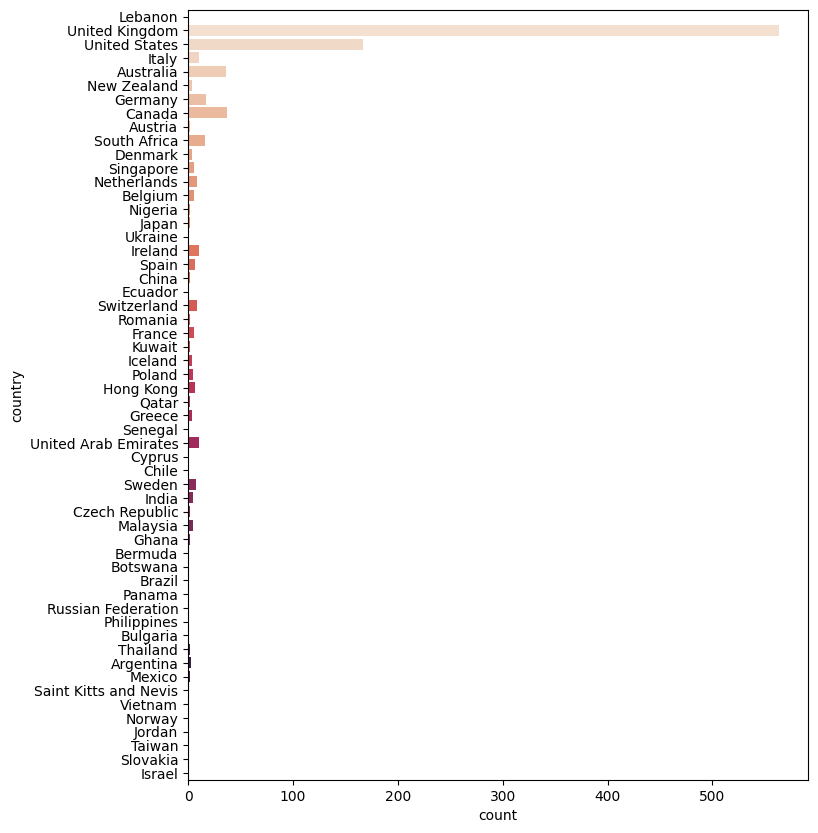

In [104]:
plt.figure(figsize=(8,10))
sns.countplot(y='country',data =df,palette='rocket_r')

###Top 10 countries with the most reviews

In [105]:
top_10 = df['country'].value_counts()[:10].rename_axis('country').reset_index(name = 'count')
top_10.style.background_gradient(cmap='Blues')

,country,count
0,United Kingdom,563
1,United States,167
2,Canada,37
3,Australia,36
4,Germany,17
5,South Africa,16
6,United Arab Emirates,10
7,Italy,10
8,Ireland,10
9,Netherlands,9


<ipython-input-106-0848b2492be5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10['country'][:5], y=top_10['count'],palette = 'rainbow')


<Axes: title={'center': 'Top 5 countries with the most reviews'}, xlabel='country', ylabel='count'>

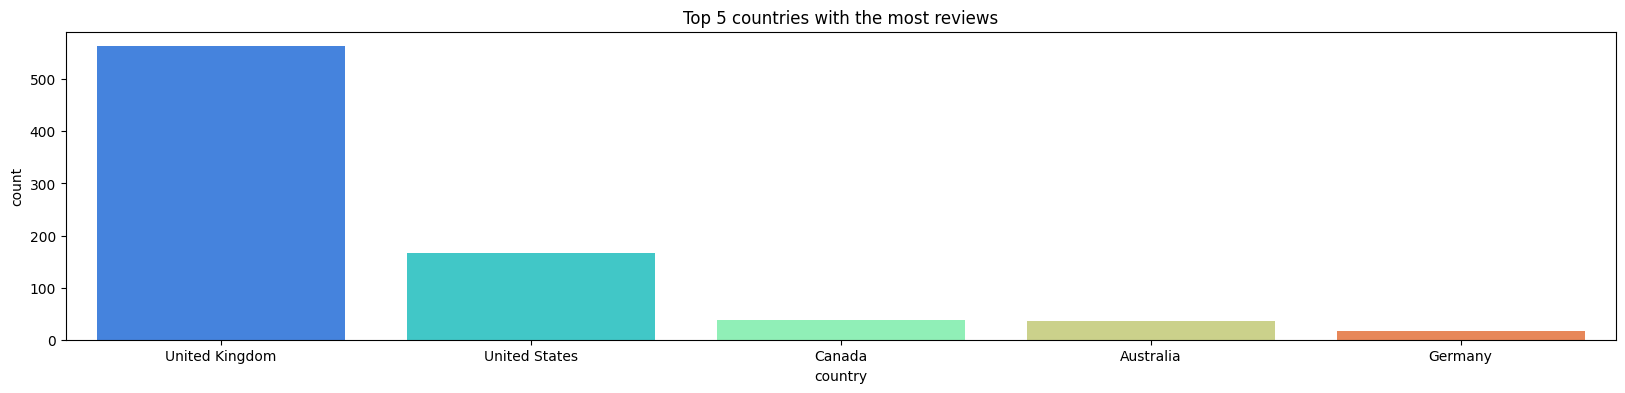

In [106]:
plt.figure(figsize=(20,4))   #Set the width and height of the figure
plt.title("Top 5 countries with the most reviews")     #Add title

sns.barplot(x=top_10['country'][:5], y=top_10['count'],palette = 'rainbow')

In [107]:
df['rating'] = pd.to_numeric(df['rating'])

In [108]:
#avg 56 countries
round(df['rating'].mean(),3)

3.999

In [109]:
#total review
len(df)

1000

In [110]:
df['country'].nunique()

56

In [111]:
avg_rating_per_year = round(df.groupby('year')['rating'].mean(),2)
avg_rating_per_year = avg_rating_per_year.rename_axis('year').reset_index(name = 'rating')
avg_rating_per_year

,year,rating
0,2019,4.67
1,2020,4.34
2,2021,4.30
3,2022,4.00
4,2023,3.35
5,2024,3.83


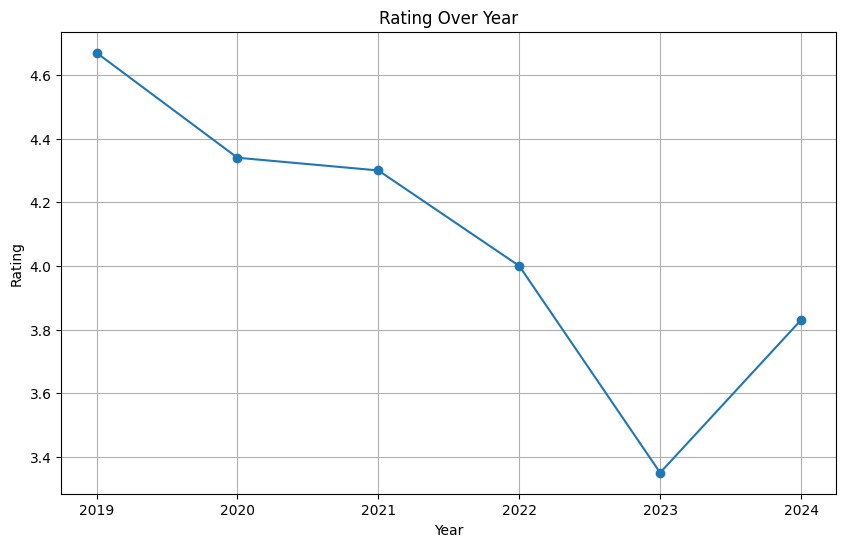

In [119]:
# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(avg_rating_per_year['year'], avg_rating_per_year['rating'], marker='o')
plt.title('Rating Over Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [113]:
rating_count = (round(df['rating'])).value_counts().reset_index(name = 'count')
rating_count

,rating,count
0,1,374
1,2,110
2,3,98
3,10,86
4,8,76
5,9,75
6,4,56
7,5,47
8,7,41
9,6,37


<ipython-input-114-aab1e6a0aa6c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_count['rating'], y=rating_count['count'],palette = 'rainbow_r')


<Axes: title={'center': 'Rating Counts'}, xlabel='rating', ylabel='count'>

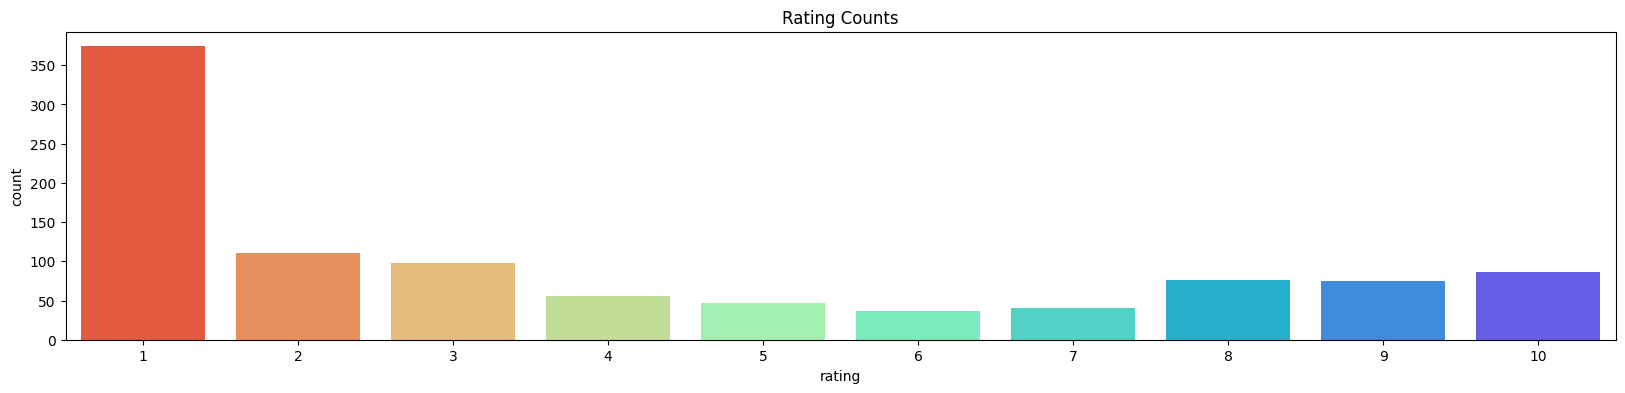

In [114]:
plt.figure(figsize=(20,4))   #Set the width and height of the figure
plt.title("Rating Counts")     #Add title

sns.barplot(x=rating_count['rating'], y=rating_count['count'],palette = 'rainbow_r')

In [135]:
df[df['rating']==10]

,review,country,date,rating,year,Sentiment,Analysis
1,"Crew were amazing and attentive, nothing wa...",United Kingdom,2024-08-07,10,2024,0.9402,Positive
5,"Flight cancelled due to bad weather, BA conta...",United Kingdom,2024-08-02,10,2024,0.1779,Neutral
52,I wanted to write this review so I could give...,United States,2024-04-07,10,2024,0.9700,Positive
60,LHR to Delhi in Business. Exceptional flight...,United Kingdom,2024-03-25,10,2024,0.9794,Positive
76,I upgraded at check in to Club Europe seat 1...,United Kingdom,2024-03-02,10,2024,0.9842,Positive
...,...,...,...,...,...,...,...
978,London Heathrow to New York. The staff went a...,United Kingdom,2019-06-28,10,2019,0.9842,Positive
979,Gatwick to Bermuda. Boarded very quickly and...,United Kingdom,2019-06-27,10,2019,0.9796,Positive
980,London Heathrow to Larnaca. Perfect. The ear...,United Kingdom,2019-06-27,10,2019,0.9505,Positive
996,Buenos Aires to London. I wish to thank the ...,Spain,2019-06-07,10,2019,0.2978,Neutral


In [136]:
df[df['rating']==1]

,review,country,date,rating,year,Sentiment,Analysis
2,I flew internationally for the first time in...,United States,2024-08-05,1,2024,-0.8243,Negative
3,"BA, after subsequent delays and postponed dep...",Italy,2024-08-03,1,2024,-0.9884,Negative
4,It is embarrassing to have the word “Britis...,Australia,2024-08-02,1,2024,-0.4525,Negative
6,British Airways oversold my LHR to LAX fligh...,United States,2024-07-30,1,2024,-0.9732,Negative
8,When dropping off my luggage at the luggage ...,United Kingdom,2024-07-28,1,2024,-0.5892,Negative
...,...,...,...,...,...,...,...
984,Amsterdam to London on 15th April. I arrived...,Australia,2019-06-24,1,2019,0.0576,Neutral
988,London to Seoul. Nightmare experience with Br...,United Kingdom,2019-06-16,1,2019,-0.7345,Negative
991,Miami to Delhi via London. The BA business ...,United States,2019-06-12,1,2019,-0.7549,Negative
997,London to Nashville. The worst airline Trans...,United Kingdom,2019-06-06,1,2019,-0.9925,Negative


###Word Cloud

In [115]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

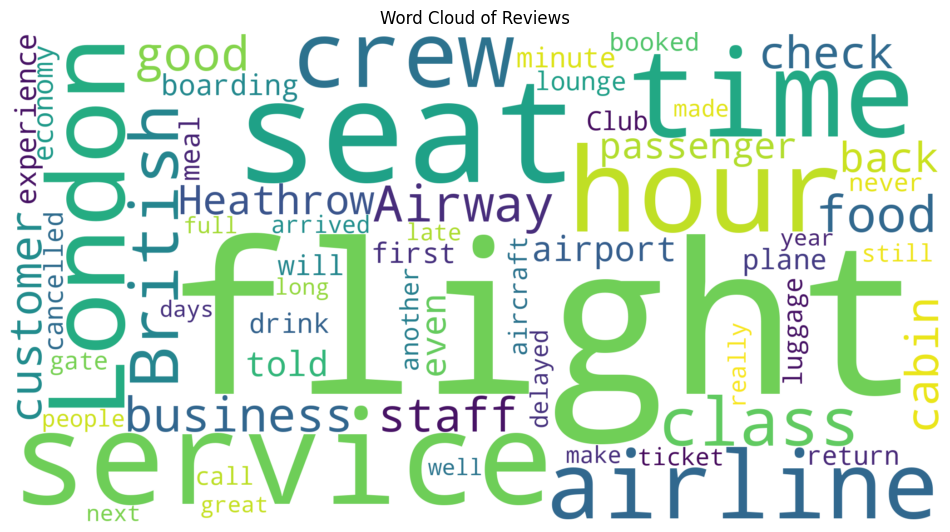

In [116]:
# creating the text variable
text = ' '.join(df['review'])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations=False, background_color='white',
                       max_words=60, stopwords=STOPWORDS, min_word_length=4,
                       width=2048, height=1080).generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(12, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.savefig('./review_wordcloud.jpg',dpi=720) # saving the image
plt.show()

###Sentiment Analysis

In [117]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['review'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,review,country,date,rating,year,Sentiment,Analysis
0,An excellent flight on BA CityFlyer. The plan...,Lebanon,2024-08-07,8,2024,0.9888,Positive
1,"Crew were amazing and attentive, nothing wa...",United Kingdom,2024-08-07,10,2024,0.9402,Positive
2,I flew internationally for the first time in...,United States,2024-08-05,1,2024,-0.8243,Negative
3,"BA, after subsequent delays and postponed dep...",Italy,2024-08-03,1,2024,-0.9884,Negative
4,It is embarrassing to have the word “Britis...,Australia,2024-08-02,1,2024,-0.4525,Negative


In [122]:
sentiment_analysis = df.groupby('country')['Analysis'].value_counts().reset_index(name = 'count')
sentiment_analysis

,country,Analysis,count
0,Argentina,Negative,3
1,Australia,Negative,26
2,Australia,Positive,7
3,Australia,Neutral,3
4,Austria,Neutral,1
...,...,...,...
93,United Kingdom,Neutral,38
94,United States,Negative,107
95,United States,Positive,43
96,United States,Neutral,17


In [127]:
sentiment_analysis[sentiment_analysis['country']=='United Kingdom']

,country,Analysis,count
91,United Kingdom,Negative,276
92,United Kingdom,Positive,249
93,United Kingdom,Neutral,38


In [128]:
sentiment_analysis[sentiment_analysis['country']=='United States']

,country,Analysis,count
94,United States,Negative,107
95,United States,Positive,43
96,United States,Neutral,17


In [134]:
sentiment_country = df.groupby('country')['rating'].value_counts().reset_index(name = 'count')
sentiment_country[sentiment_country['rating']==10]

,country,rating,count
6,Australia,10,1
19,Brazil,10,1
22,Canada,10,3
31,Chile,10,1
34,Cyprus,10,1
40,Denmark,10,1
49,Germany,10,1
56,Hong Kong,10,1
64,India,10,1
71,Ireland,10,1
